# Tutorial to calculate the branching ratio of a model and plot it
In this tutorial, we will reproduce Fig. XX from XXXX.XXXXX, where we calculate the branching ratios for different benchmark models, which will be QED-DFSZ, Q-KSVZ, top-philic and flaxion, comparing the hadronic, leptonic and photonic $\mathcal{BR}$ of each of them. Additionally, we will obtain the detailed contribution of evvery channels for two specific cases, namely QED-DFSZ and Q-KSVZ.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from alpaca import ALPcouplings, citations, branching_ratio, decay_width
from alpaca import alp_channels_branching_ratios
from alpaca.plotting.mpl import alp_channels_plot
from alpaca.decays.alp_decays import hadronic_decays_def, gaugebosons
from alpaca.decays.alp_decays.branching_ratios import BRsalp
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

## Model comparison

In [2]:
from alpaca.models.model_library import QED_DFSZ, beta
from alpaca.models.model_library import Q_KSVZ, KSVZ_charge
from alpaca.models.model_library import flaxion_benchmark

In [3]:
fa = 1000 #GeV, scale
ma = np.logspace(-1,1,1000) #GeV, mass of the ALP

### QED-DFSZ

First, we will obtain and run the couplings in the QED-DFSZ model. For this, we will set $\beta=\pi/4$. The initial scale of the model is $f_a$. In the matching we will choose the leading logarithm approximation.

In [5]:
couplingsQED = QED_DFSZ.get_couplings({beta: np.pi/4}, fa).match_run(10, 'VA_below', 'leadinglog') 

##### Branching ratios
Next we will calculate the branching ratios of each channel individually

In [ ]:
#Decay to leptons
brQED_DFSZ_ee = branching_ratio('a -> e e', ma, couplingsQED, fa, integrator='no_rge')
brQED_DFSZ_mumu = branching_ratio('a -> mu mu', ma, couplingsQED, fa, integrator='no_rge')
brQED_DFSZ_tautau = branching_ratio('a -> tau tau', ma, couplingsQED, fa, integrator='no_rge')

brQED_DFSZ_ll = brQED_DFSZ_ee + brQED_DFSZ_mumu + brQED_DFSZ_tautau

#Decay to hadrons
brQED_DFSZ_had = branching_ratio('a -> hadrons', ma, couplingsQED, fa, integrator='no_rge')

#Decay to photons
brQED_DFSZ_gammagamma = branching_ratio('a -> photon photon', ma, couplingsQED, fa, integrator='no_rge')

### Q-KSVZ

First, we will obtain and run the couplings in the Q-KSVZ model. For this, we will set $Q_\text{KSVZ}=1$. The initial scale of the model is $f_a$. In the matching we will choose the leading logarithm approximation.

In [13]:
couplingsKSVZ = Q_KSVZ.get_couplings({KSVZ_charge: 1}, fa).match_run(10, 'VA_below', 'leadinglog')

##### Branching ratios
Next we will calculate the branching ratios of each channel individually

In [ ]:
#Decay to leptons
brKSVZ_ee = branching_ratio('a -> e e', ma, couplingsKSVZ, fa, integrator='no_rge')
brKSVZ_mumu = branching_ratio('a -> mu mu', ma, couplingsKSVZ, fa, integrator='no_rge')
brKSVZ_tautau = branching_ratio('a -> tau tau', ma, couplingsKSVZ, fa, integrator='no_rge')

brKSVZ_ll = brKSVZ_ee + brKSVZ_mumu + brKSVZ_tautau

#Decay to hadrons
brKSVZ_had = branching_ratio('a -> hadrons', ma, couplingsKSVZ, fa, integrator='no_rge')

#Decay to photons
brKSVZ_gammagamma = branching_ratio('a -> photon photon', ma, couplingsKSVZ, fa, integrator='no_rge')

### Top-philic

In the next case, we will delve into the top-philic ALP, with Lagrangian $$\mathcal{L}\subset \frac{\partial_\mu a}{f_a} (\overline{t_R}\gamma^\mu c_t t_R)$$

In [8]:
couplingstop = ALPcouplings({'cuR': np.diag([0, 0, 1])}, scale=fa, basis='derivative_above').match_run(10, 'VA_below', 'leadinglog')

Next, we compute the branching ratios for each channel

In [ ]:
#Decay to leptons
brtop_ee = branching_ratio('a -> e e', ma, couplingstop, fa, integrator='no_rge')
brtop_mumu = branching_ratio('a -> mu mu', ma, couplingstop, fa, integrator='no_rge')
brtop_tautau = branching_ratio('a -> tau tau', ma, couplingstop, fa, integrator='no_rge')

brtop_ll = brtop_ee + brtop_mumu + brtop_tautau

#Decay to hadrons
brtop_had = branching_ratio('a -> hadrons', ma, couplingstop, fa, integrator='no_rge')

#Decay to photons
brtop_gammagamma = branching_ratio('a -> photon photon', ma, couplingstop, fa, integrator='no_rge')

### Flaxion

In the case of the flaxion model, we choose a benchmark case in which $\epsilon =0.2$

In [9]:
couplingsflaxion = flaxion_benchmark.get_couplings(0.2, fa).match_run(10, 'VA_below', 'leadinglog')

We now compute the different branching ratios. Since one of the characteristics of flaxion models is the existence of tree-level flavour-violating couplings, we also compute the \mathcal{BR} of them here

In [ ]:
#Decay to leptons
brflaxion_ee = branching_ratio('a -> e e', ma, couplingsflaxion, fa, integrator='no_rge')
brflaxion_mumu = branching_ratio('a -> mu mu', ma, couplingsflaxion, fa, integrator='no_rge')
brflaxion_tautau = branching_ratio('a -> tau tau', ma, couplingsflaxion, fa, integrator='no_rge')
brflaxion_emu = branching_ratio('a -> e mu', ma, couplingsflaxion, fa, integrator='no_rge')
brflaxion_etau = branching_ratio('a -> e tau', ma, couplingsflaxion, fa, integrator='no_rge')
brflaxion_mutau = branching_ratio('a -> mu tau', ma, couplingsflaxion, fa, integrator='no_rge')

brflaxion_ll = brflaxion_ee + brflaxion_mumu + brflaxion_tautau + brflaxion_emu + brflaxion_etau + brflaxion_mutau

#Decay to hadrons
brflaxion_had = branching_ratio('a -> hadrons', ma, couplingsflaxion, fa, integrator='no_rge')

#Decay to photons
brflaxion_gammagamma = branching_ratio('a -> photon photon', ma, couplingsflaxion, fa, integrator='no_rge')

### Plot
In the following steps, we will plot the hadronic, leptonic and photonic branching ratios of each of the previous benchmark models to compare them and study the different features they have.

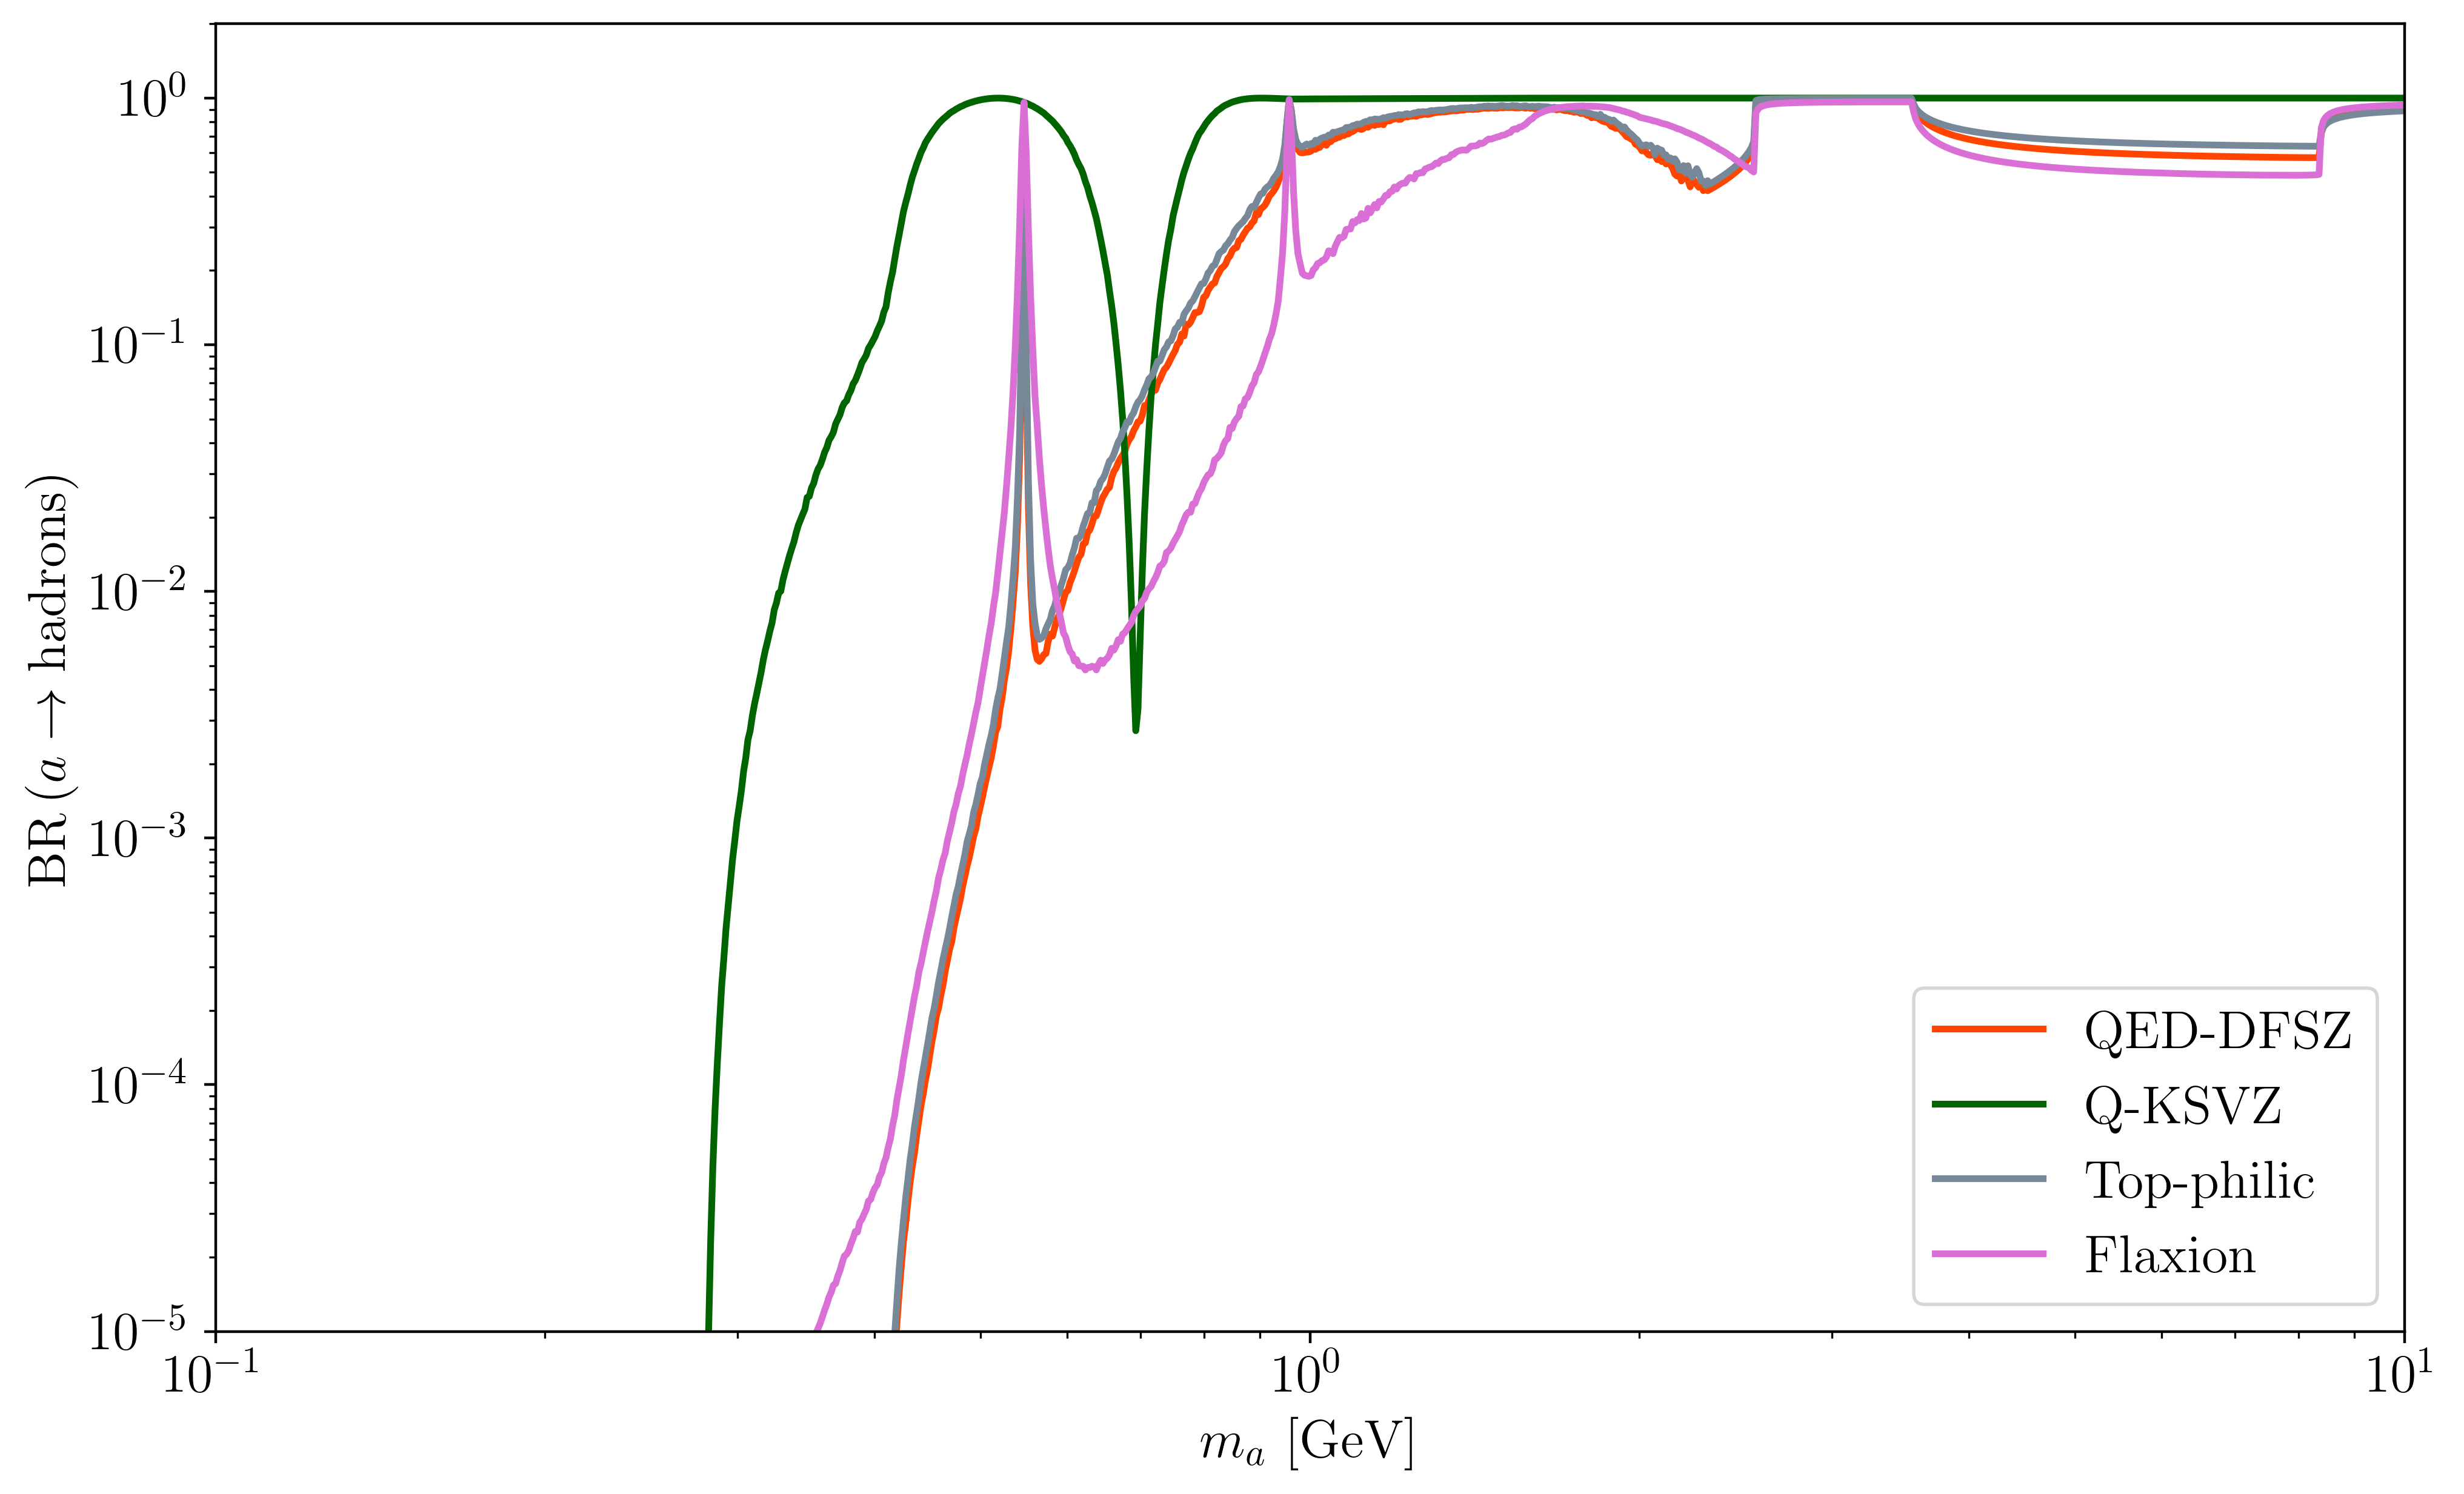

In [ ]:
fig, ax = plt.subplots(figsize=(25.4/2.54, 6*2.54/2.54), dpi=400) 

ax.plot(ma, brQED_DFSZ_had, label=r"QED-DFSZ", color='orangered',linewidth=2)
ax.plot(ma, brKSVZ_had, label=r"Q-KSVZ", color='darkgreen',linewidth=2)
ax.plot(ma, brtop_had, label=r"Top-philic", color='lightslategrey',linewidth=2)
ax.plot(ma, brflaxion_had, label=r"Flaxion", color='orchid',linewidth=2)

ax.set_ylim(1e-5,2)
ax.set_xlim(1e-1,1e1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$m_a \, \left[\textrm{GeV}\right]$", fontsize=16)
ax.set_ylabel(r"$\textrm{BR} \left(a\to \textrm{hadrons}\right)$", fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.legend(fontsize=16, loc='lower right')

plt.tight_layout(pad=0.1)
#plt.savefig('br_comparison_models_hadron.png', dpi=400)
#plt.savefig('br_comparison_models_hadron.pdf', dpi=400)

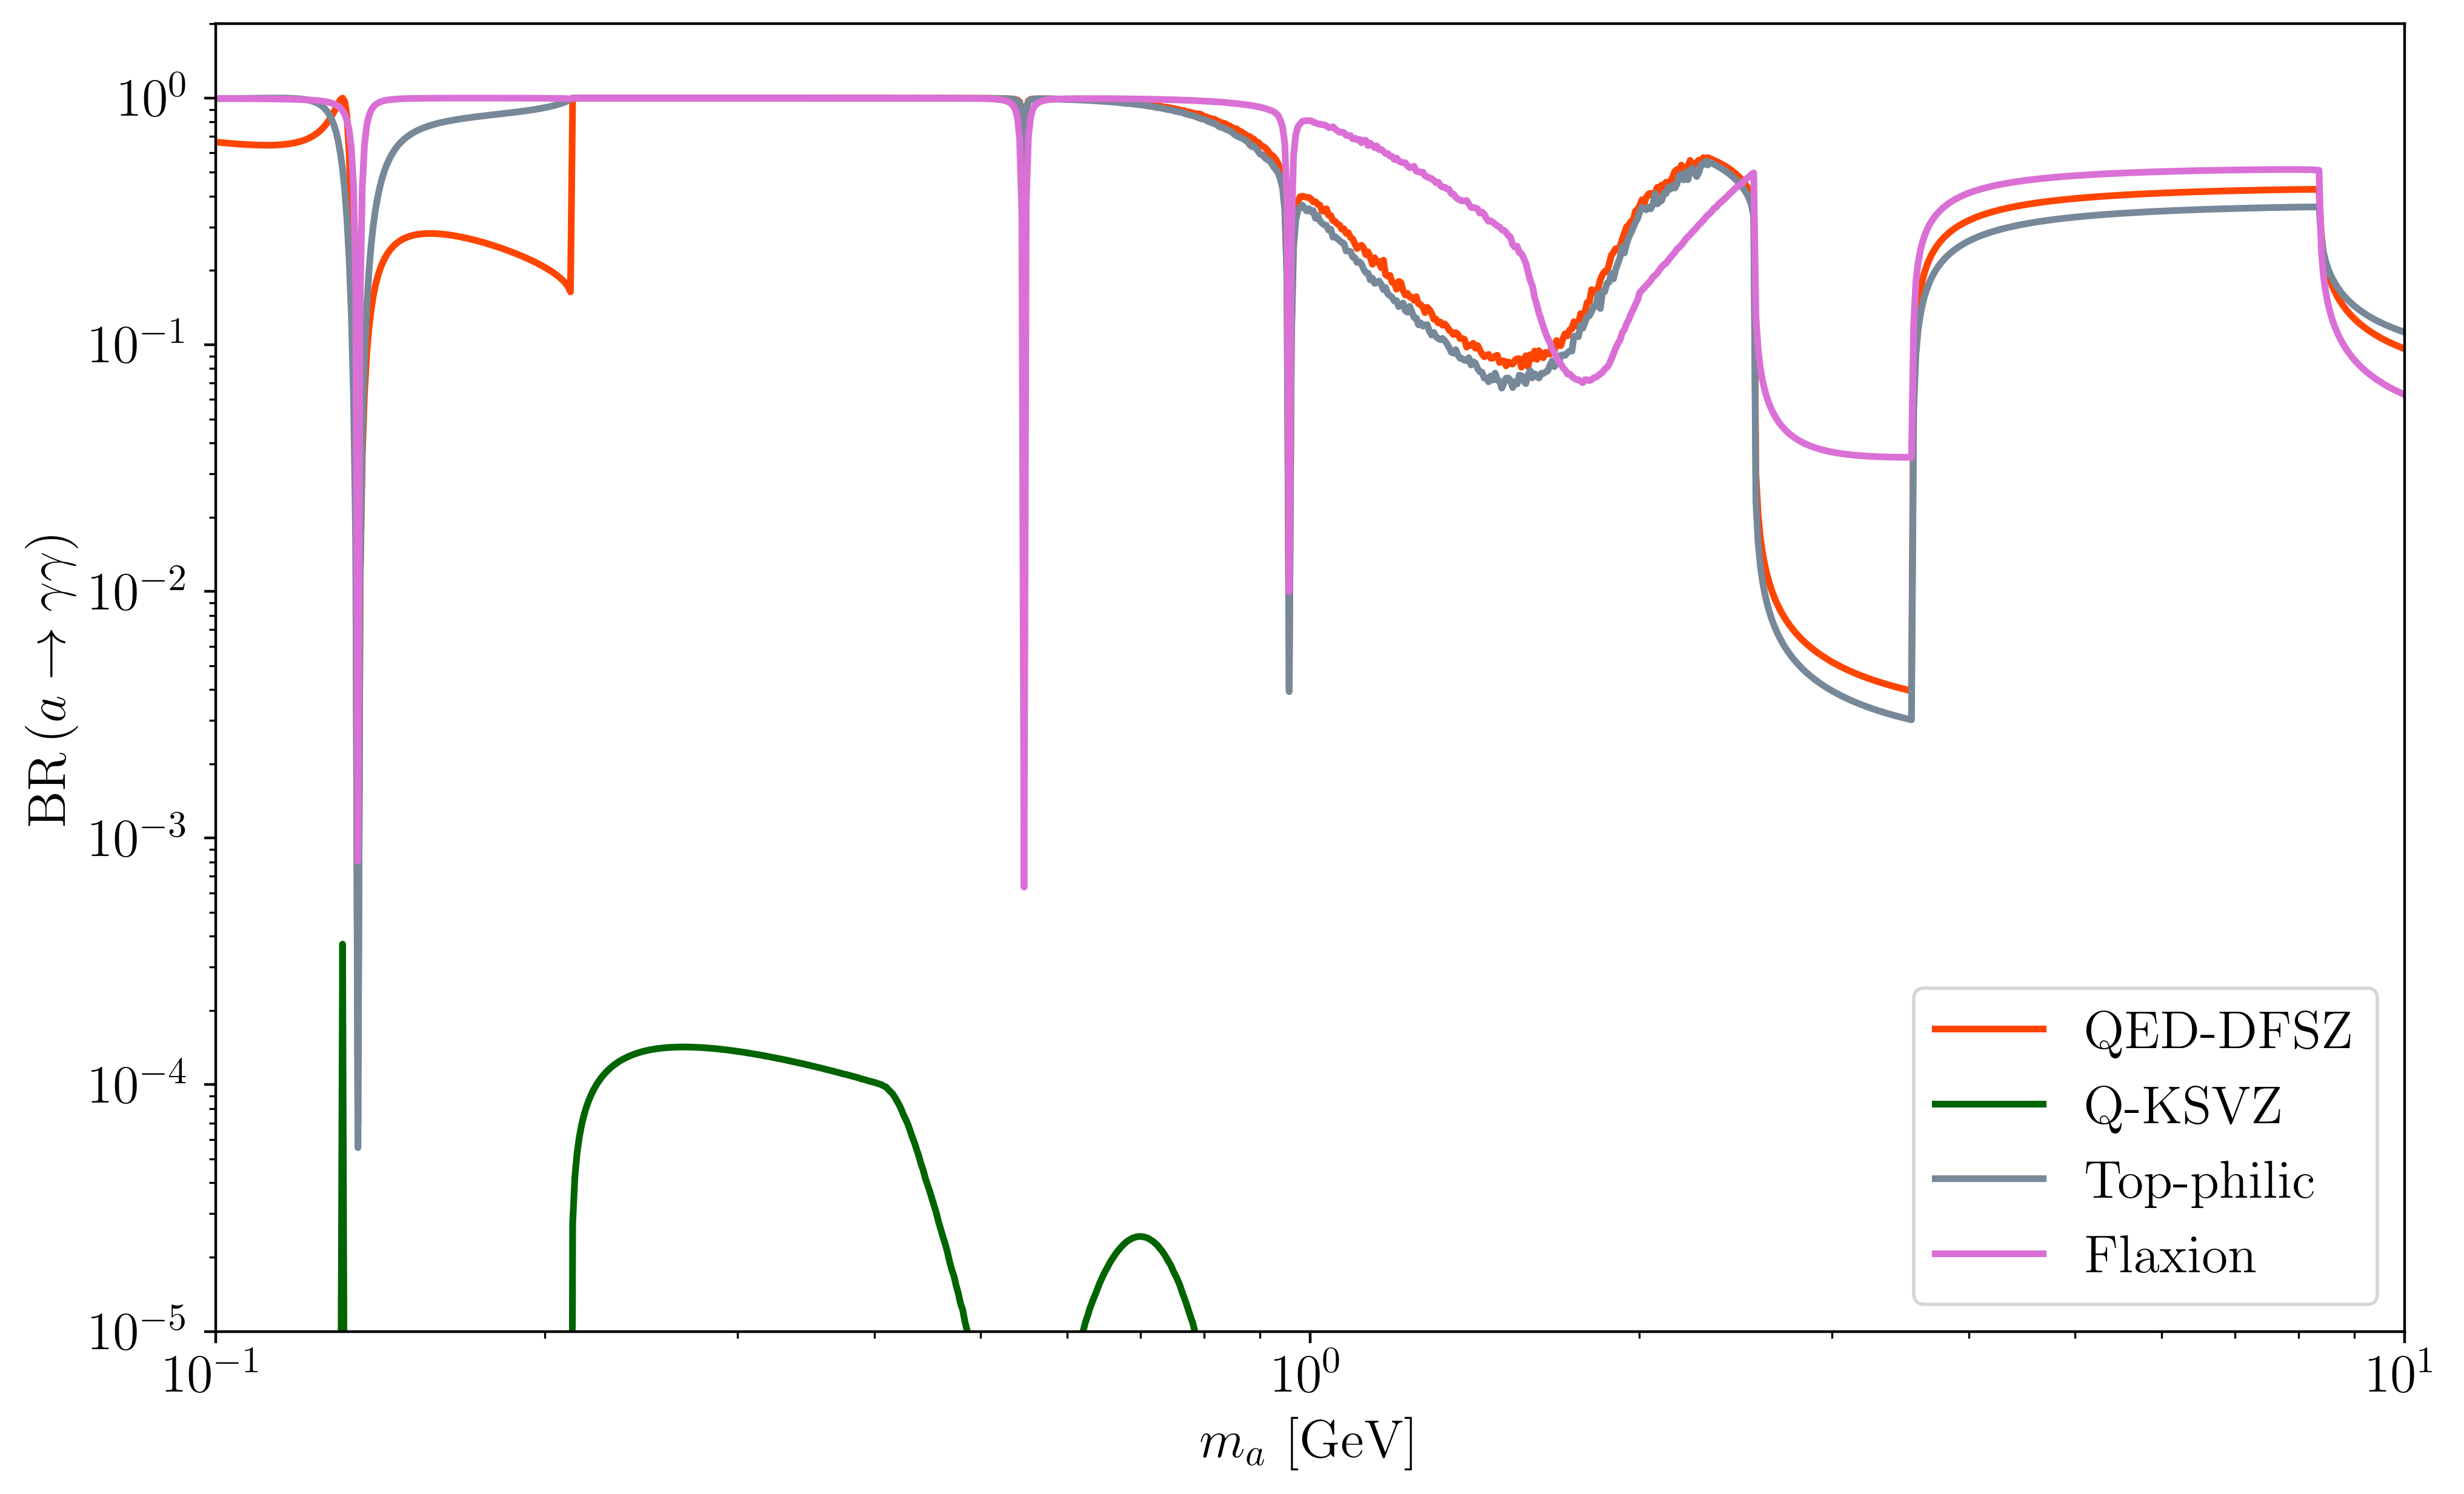

In [ ]:
fig, ax = plt.subplots(figsize=(25.4/2.54, 6*2.54/2.54), dpi=400) 

ax.plot(ma, brQED_DFSZ_ll, label=r"QED-DFSZ", color='orangered', linewidth=2)
ax.plot(ma, brKSVZ_ll, label=r"Q-KSVZ", color='darkgreen', linewidth=2)
ax.plot(ma, brtop_ll, label=r"Top-philic", color='lightslategrey', linewidth=2)
ax.plot(ma, brflaxion_ll, label=r"Flaxion", color='orchid', linewidth=2)


ax.set_ylim(1e-5,2)
ax.set_xlim(1e-1,1e1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$m_a \, \left[\textrm{GeV}\right]$", fontsize=16)
ax.set_ylabel(r"$\textrm{BR} \left(a\to \ell\ell\right)$", fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
secax = ax.secondary_xaxis('top')
secax.set_xticks([2*0.511e-3,2*0.105,2*1.74])
secax.set_xticklabels(['$2m_e$','$2m_\\mu$', '$2m_\\tau$'])
plt.legend(fontsize=16)

plt.tight_layout(pad=0.1)
#plt.savefig('br_comparison_models_ll.png', dpi=400)
#plt.savefig('br_comparison_models_ll.pdf', dpi=400)

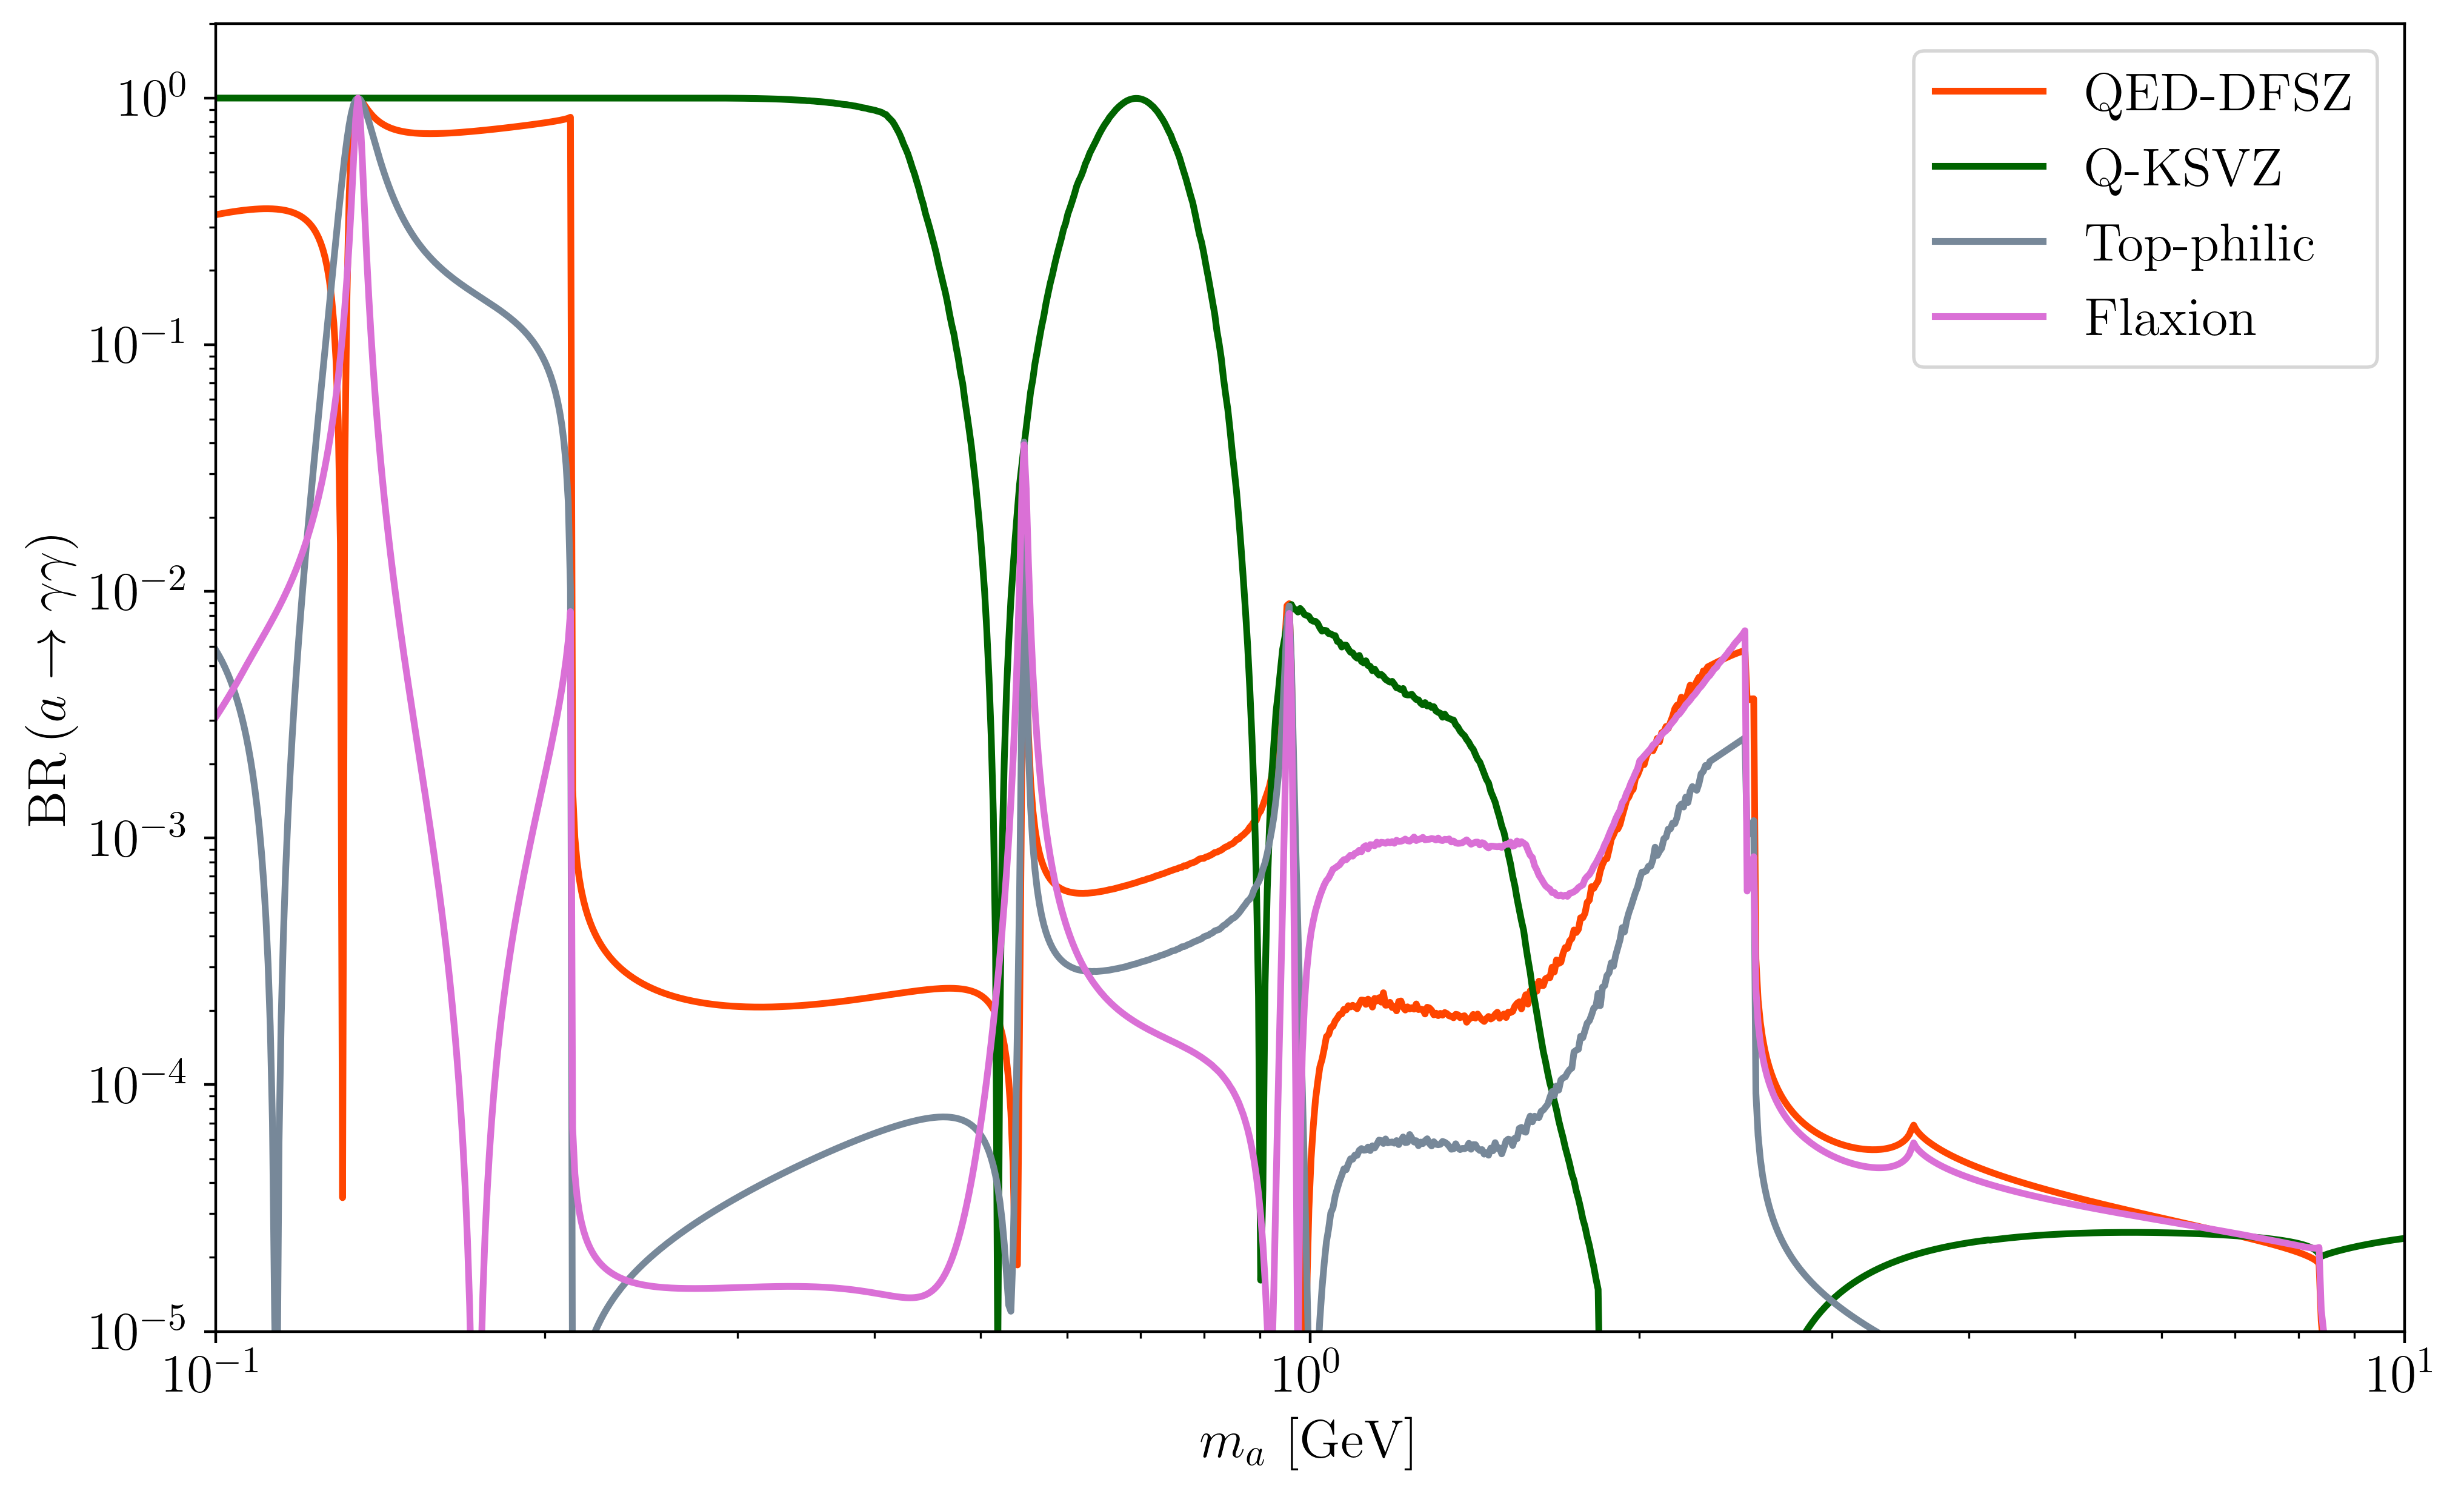

In [ ]:
fig, ax = plt.subplots(figsize=(25.4/2.54, 6*2.54/2.54), dpi=400) 

ax.plot(ma, brQED_DFSZ_gammagamma, label=r"QED-DFSZ", color='orangered', linewidth=2)
ax.plot(ma, brKSVZ_gammagamma, label=r"Q-KSVZ", color='darkgreen', linewidth=2)
ax.plot(ma, brtop_gammagamma, label=r"Top-philic", color='lightslategrey', linewidth=2)
ax.plot(ma, brflaxion_gammagamma, label=r"Flaxion", color='orchid', linewidth=2)


ax.set_ylim(1e-5,2)
ax.set_xlim(1e-1,1e1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$m_a \, \left[\textrm{GeV}\right]$", fontsize=16)
ax.set_ylabel(r"$\textrm{BR} \left(a\to \gamma\gamma\right)$", fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
#secax = ax.secondary_xaxis('top')
#secax.set_xticks([2*0.511e-3,2*0.105,2*1.74])
#secax.set_xticklabels(['$2m_e$','$2m_\\mu$', '$2m_\\tau$'])
plt.legend(fontsize=16)

plt.tight_layout(pad=0.1)
#plt.savefig('br_comparison_models_gammagamma.png', dpi=400)
#plt.savefig('br_comparison_models_gammagamma.pdf', dpi=400)

## Specific $\mathcal{BR}$

It is also interesting to study the branching ratios of each model on its own. For this case, we will focus only on the QED-DFSZ and Q-KSVZ models. For this purpose, we will make use of two specific functions, developed to compute and plot all possible channels' branching ratios.

### QED-DFSZ model

In [6]:
brQED_DFSZ_glob = alp_channels_branching_ratios(ma, couplingsQED, fa)

<Axes: xlabel='$m_a \\, \\left[\\textrm{GeV}\\right]$', ylabel='$\\textrm{BR} \\left(a\\to \\textrm{SM}\\right)$'>

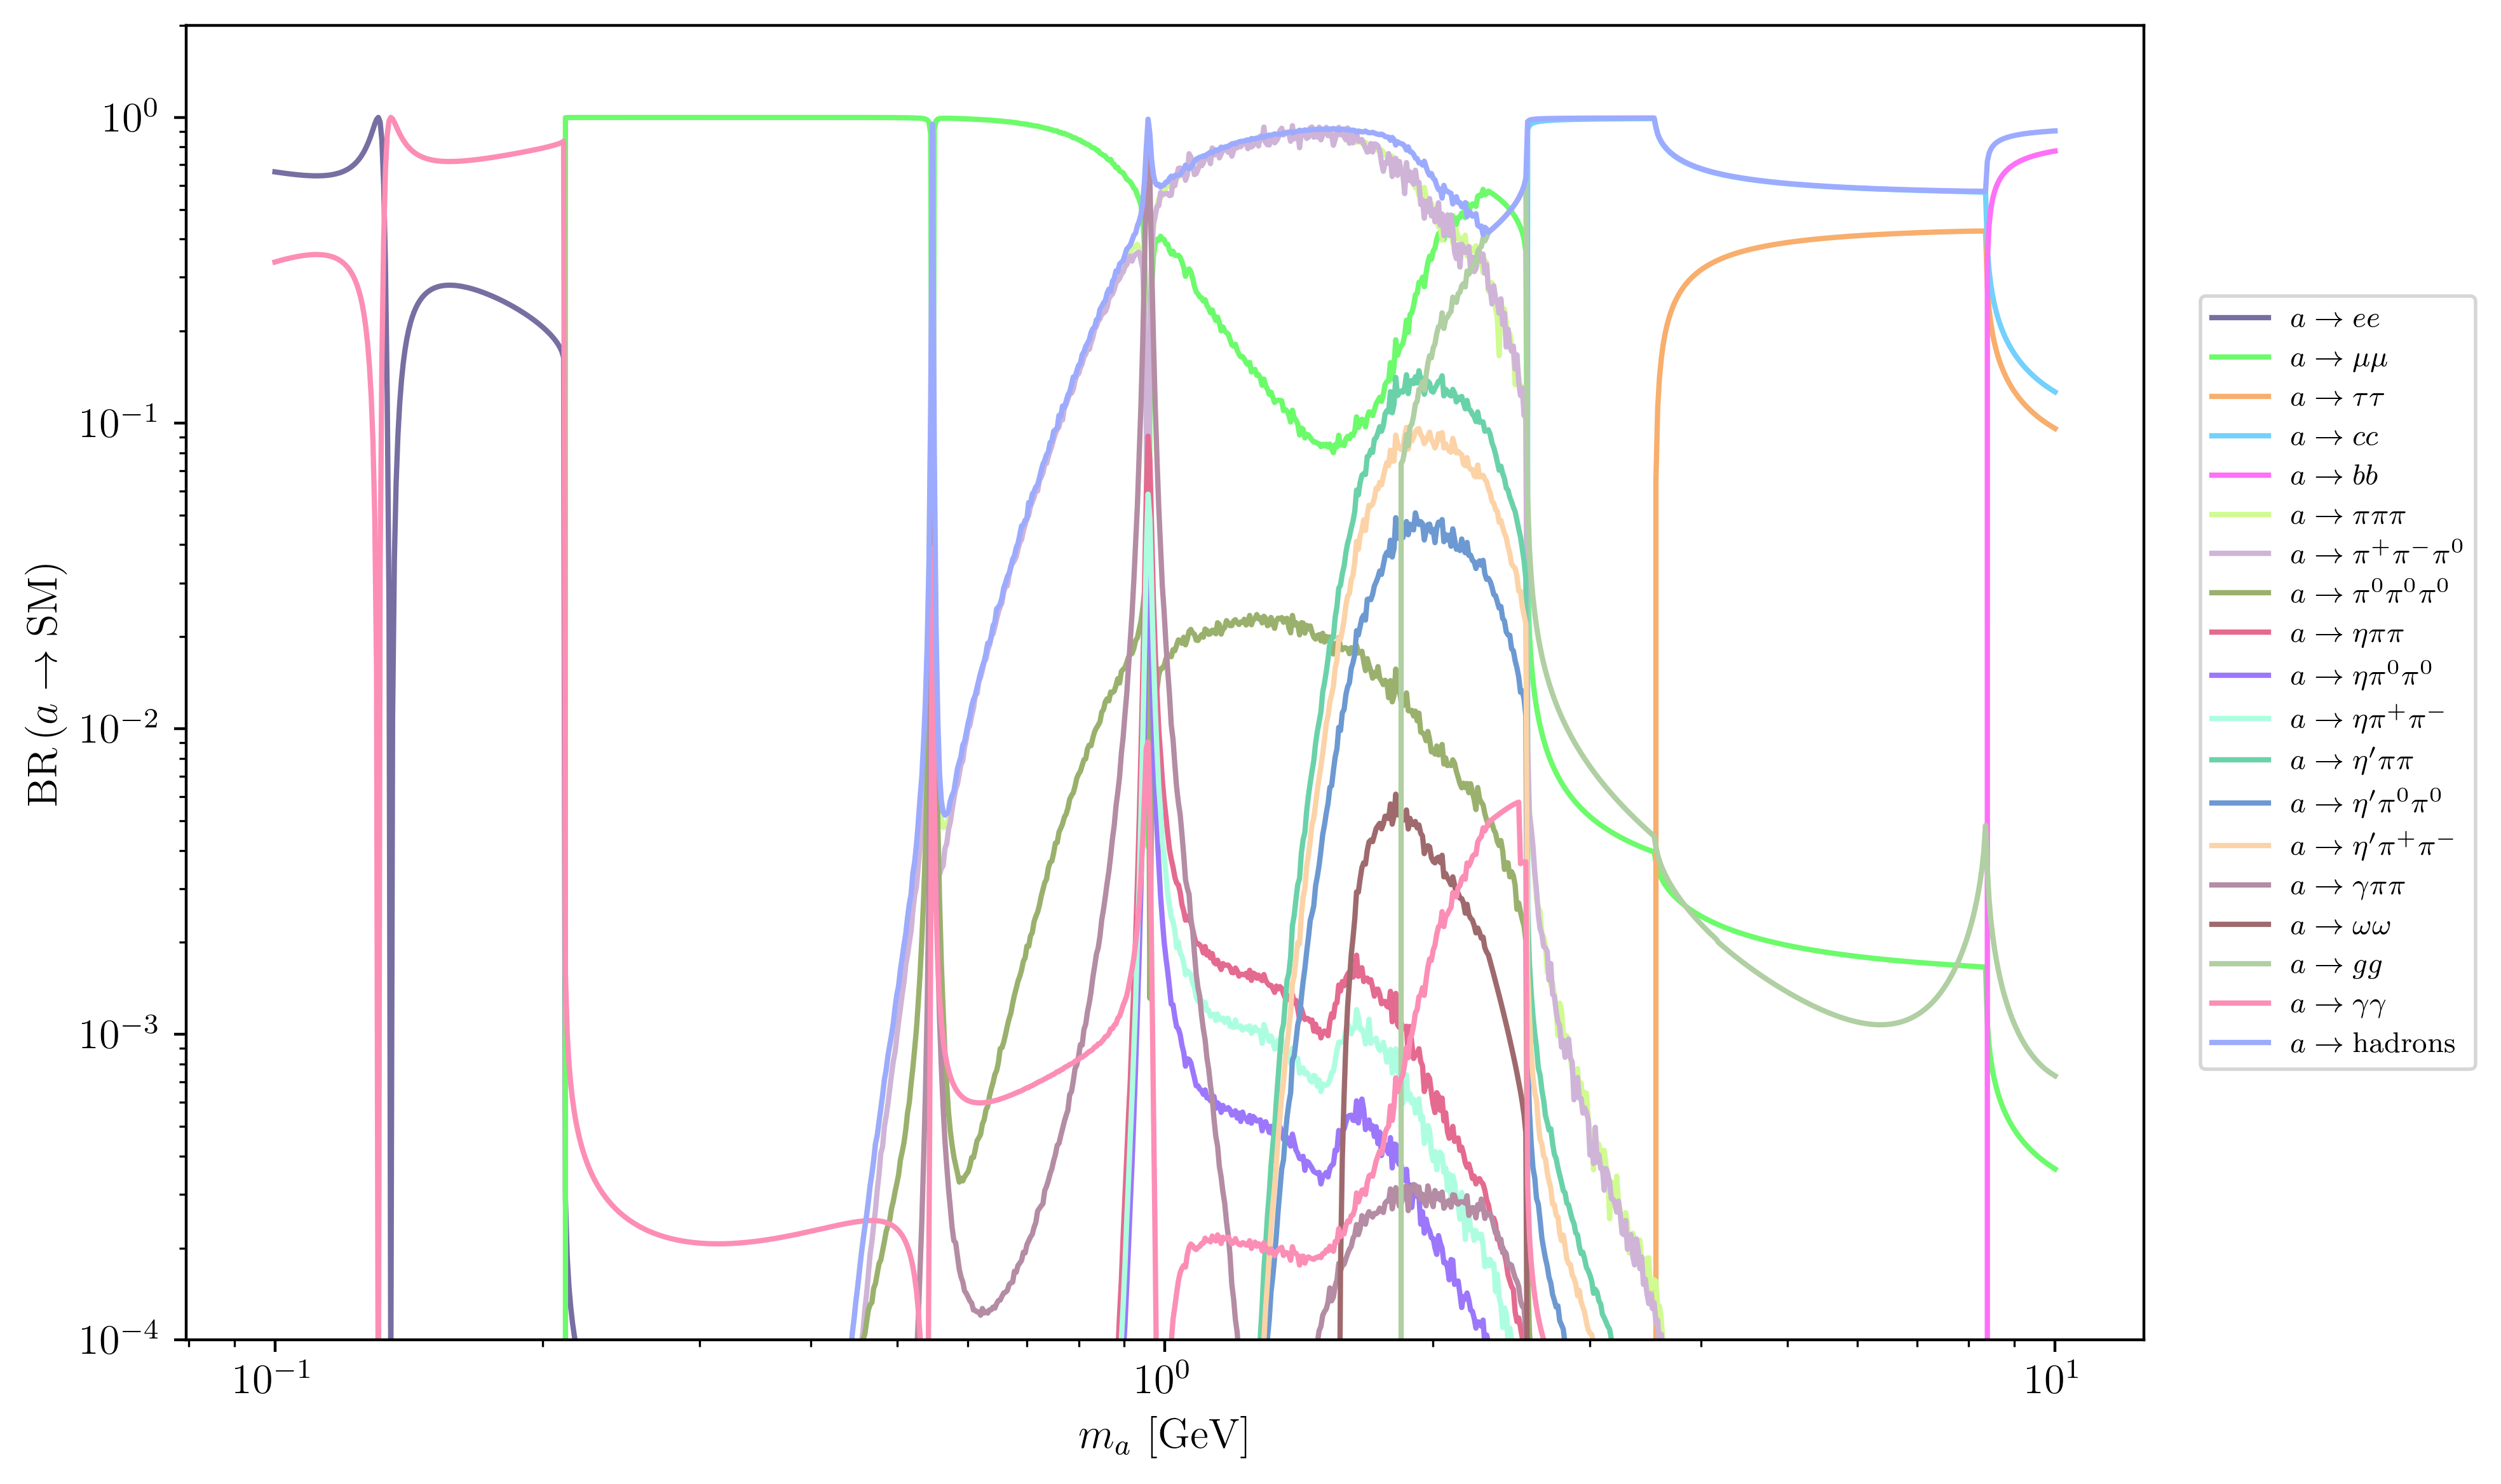

In [ ]:
fig, ax = plt.subplots(figsize=(25.4/2.54, 6*2.54/2.54), dpi=400) 

alp_channels_plot(ma,brQED_DFSZ_glob,xlabel=r"$m_a \, \left[\textrm{GeV}\right]$",ylabel= r"$\textrm{BR} \left(a\to \textrm{SM}\right)$",ymin=1e-4,ymax=2, ax=ax)
#plt.savefig('br_all_DFSZ.png', dpi=400)
#plt.savefig('br_all_DFSZ.pdf', dpi=400)

### Q-KSVZ

In [14]:
brQ_KSVZ_glob = alp_channels_branching_ratios(ma, couplingsKSVZ, fa)

<Axes: xlabel='$m_a \\, \\left[\\textrm{GeV}\\right]$', ylabel='$\\textrm{BR} \\left(a\\to \\textrm{SM}\\right)$'>

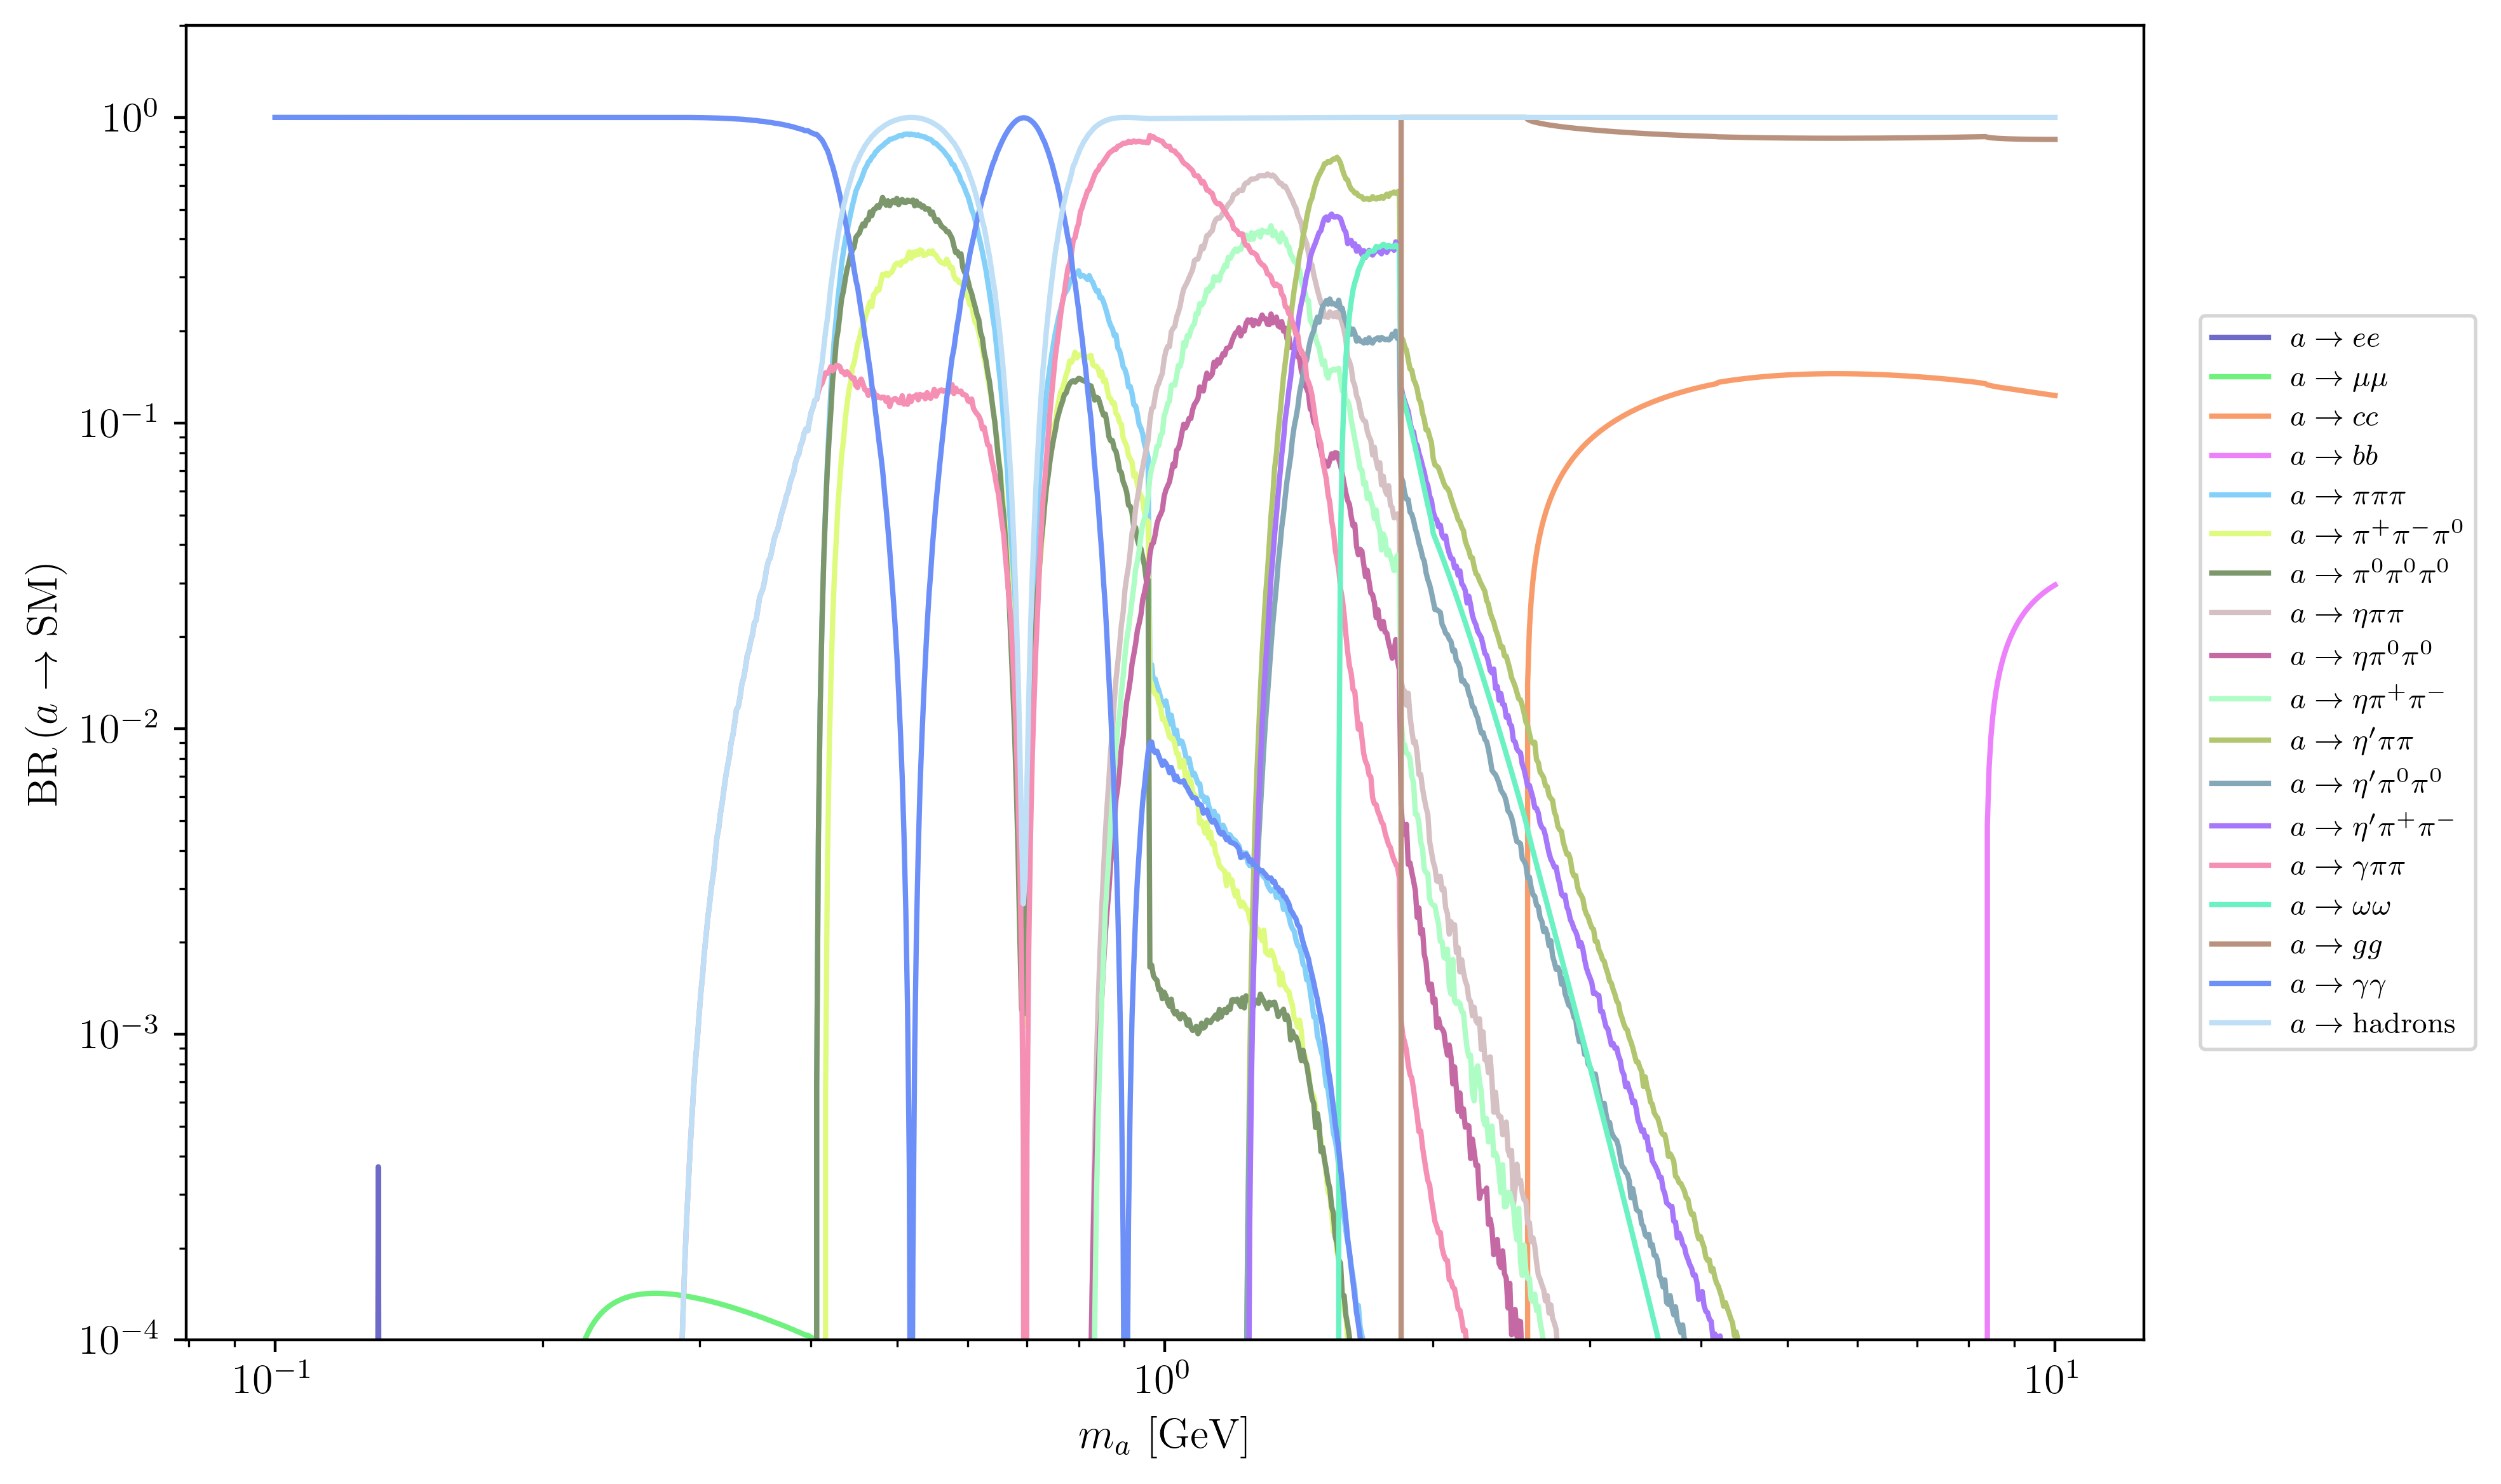

In [15]:
fig, ax = plt.subplots(figsize=(25.4/2.54, 6*2.54/2.54), dpi=400) 

alp_channels_plot(ma,brQ_KSVZ_glob,xlabel=r"$m_a \, \left[\textrm{GeV}\right]$",ylabel= r"$\textrm{BR} \left(a\to \textrm{SM}\right)$",ymin=1e-4,ymax=2, ax=ax)
#plt.savefig('br_all_KSVZ.png', dpi=400)
#plt.savefig('br_all_KSVZ.pdf', dpi=400)